In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('glass.data',names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Class'])

In [3]:
len(['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Class'])

10

In [4]:
data.shape

(214, 10)

In [5]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
data.isnull().sum()

RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [7]:
data.drop(['Class'],axis=1,inplace=True)

In [8]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [9]:
#Scaling of features for PCA
#Covariance matrix
#Eighen Value and Eighen vector for Variance 
#Distance is from origin
#Eighen value is distance or projection on PC(ith)
#Sum of distance / n-1 = Variance 
from sklearn.preprocessing import StandardScaler

In [10]:
scalar=StandardScaler()

In [11]:
scaled_data=scalar.fit_transform(data)

In [12]:
scaled_data

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [13]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [14]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [15]:
data = pd.DataFrame(scaled_data,columns=data.columns)

In [16]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca_created=pca.fit_transform(data)

In [18]:
#Same shape cause params of component is not passed 
pca_created.shape

(214, 9)

In [19]:
data.shape


(214, 9)

In [20]:
pca_created

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [21]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


Text(0, 0.5, 'EVR')

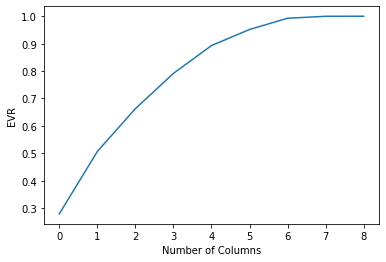

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
pca_created=pca.fit_transform(data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Columns")
plt.ylabel("EVR")

In [23]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [24]:
pca_1 = PCA(n_components=5)

In [25]:
new_data = pca_1.fit_transform(data)

In [26]:
new_data

array([[ 1.15113957, -0.52948764, -0.37209565,  1.72890103, -0.25193583],
       [-0.57413717, -0.75978777, -0.55670817,  0.76023228, -0.25707069],
       [-0.94015972, -0.92983597, -0.55490744,  0.20625431, -0.23750587],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, -0.17101386,  0.45168739],
       [-2.36974768,  2.7568728 , -1.23470076, -0.52528451,  0.51500795],
       [-2.26264885,  3.02859155, -0.89084474, -0.41449108,  0.50547398]])

In [27]:
df=pd.DataFrame(new_data,columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])

In [28]:
df.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,2.282702e-16,-8.300733e-17,-8.300733e-17,4.357885e-17,-2.749618e-17
std,1.588381e+00,1.435164e+00,1.188040e+00,1.078563e+00,9.582762e-01
min,-4.432540e+00,-1.816556e+00,-5.165069e+00,-3.777312e+00,-3.187904e+00
25%,-6.575585e-01,-1.021452e+00,-4.473870e-01,-5.235952e-01,-5.419091e-01
50%,-5.651885e-02,-6.591921e-01,-9.336385e-02,-3.727560e-02,-3.485682e-01
75%,6.342901e-01,6.345286e-01,2.820617e-01,4.704891e-01,5.596477e-01
max,7.138698e+00,6.193445e+00,7.987193e+00,3.999072e+00,3.643798e+00


In [29]:
pca_1.explained_variance_ratio_

array([0.27901819, 0.2277858 , 0.15609378, 0.12865138, 0.10155581])

In [30]:
df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090


Text(0, 0.5, 'EVR')

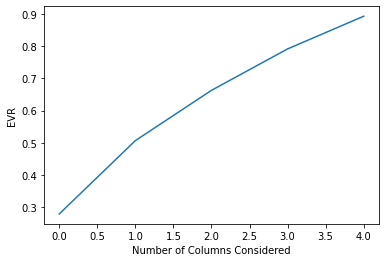

In [31]:
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.xlabel("Number of Columns Considered")
plt.ylabel("EVR")

In [32]:
data_1 = pd.read_csv('glass.data',names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Class'])

In [33]:
data_1.iloc[:,:-1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [34]:
data_1['Class'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Class, dtype: int64

In [35]:
from collections import Counter
dic=Counter(data_1['Class'])

In [36]:
print(dic) , print(dic.values())

Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9})
dict_values([70, 76, 17, 13, 9, 29])


(None, None)

In [37]:
j=0
for i in dic.values():
  print("Class with vals {0} : {1}".format(j,(i/sum(dic.values())*100)))
  j=j+1

Class with vals 0 : 32.71028037383177
Class with vals 1 : 35.51401869158878
Class with vals 2 : 7.943925233644859
Class with vals 3 : 6.074766355140187
Class with vals 4 : 4.205607476635514
Class with vals 5 : 13.551401869158877


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
DT=DecisionTreeClassifier()

In [40]:
DT.fit(df,data_1['Class'])

DecisionTreeClassifier()

In [41]:
pca_1

PCA(n_components=5)

In [42]:
#For new dataset values in pipeline
pred_dt=DT.predict(pca_1.transform(scalar.transform([[1.51761	,13.89,	3.60,	1.36,	72.73,	0.48,	7.83,	0.00,	0.0]])))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_dt,[1])

1.0

In [44]:
#Manual Code for PCA
def pc_cal(x,no):
  pca={}
  scaler=StandardScaler()
  x_scaled=scaler.fit_transform(x)
  l,x = np.linalg.eig((x_scaled.T @ x_scaled)/(x_scaled.shape[0]-1))
  for i in range(no):
    pc= x_scaled @ x[:,i]
    pca[i] = pc
  pca_df = pd.DataFrame(pca)
  return pca_df

In [45]:
#######################################################
"""Difference in Scaling transfrom and pca transform 
The input data is centered but not scaled for each feature before applying the Single value decomposition."""

'Difference in Scaling transfrom and pca transform \nThe input data is centered but not scaled for each feature before applying the Single value decomposition.'

#Unsupervised Clustering KNN


In [46]:
df =  pd.read_csv('Mall_Customers.csv')

In [47]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
gk=df.groupby('Age')
print(gk.first())

     CustomerID   Genre  Annual Income (k$)  Spending Score (1-100)
Age                                                                
18           34    Male                  33                      92
19            1    Male                  15                      39
20            3  Female                  16                       6
21            2    Male                  15                      81
22            6  Female                  17                      76
23            4  Female                  16                      77
24           14  Female                  20                      77
25           22    Male                  24                      73
26           76    Male                  54                      54
27           48  Female                  40                      47
28          143  Female                  76                      40
29           26    Male                  28                      82
30           10  Female                  19     

In [49]:
import seaborn as sns
#sns.heatmap(df.iloc[:,2:4])
df.iloc[:,2:4].corr()

,Age,Annual Income (k$)
Age,1.000000,-0.012398
Annual Income (k$),-0.012398,1.000000


In [50]:
df.shape

(200, 5)

In [51]:
x=df.iloc[:,3:5]

In [52]:
from sklearn.cluster import KMeans

In [53]:
# Within cluster sum of squares
wcss = []
for i in range(1,15):
  kmean=KMeans(n_clusters=i , init='k-means++' ,random_state=30)
  kmean.fit(x)
  #Within cluster sum of squares is inertia
  wcss.append(kmean.inertia_)

In [54]:
len(wcss) , print(wcss.index(min(wcss))) ,print(wcss) ,print(min(wcss))

13
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30273.394312070042, 25311.63315295815, 21850.165282585636, 19641.456216651564, 17887.084456628647, 15990.444512350394, 14666.175194043302, 12797.180630643863]
12797.180630643863


(14, None, None, None)

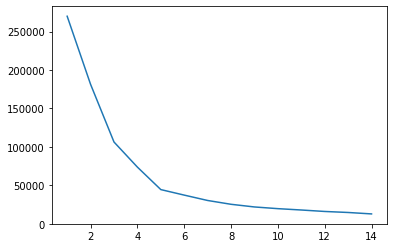

In [55]:
plt.plot(range(1,15),wcss)

In [56]:
# Old Kmean with no params
new=pd.DataFrame()
new['Cluster Number'] = kmean.fit_predict(x)

In [57]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [58]:
kmeans_parms=KMeans(n_clusters=5 , init='k-means++' ,random_state=30)
kmeans_parms.fit_predict(x)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [59]:
new['Cluster Number With Limit of 5']=kmeans_parms.fit_predict(x)

In [60]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [61]:
new[new['Cluster Number With Limit of 5']==4]

,Cluster Number,Cluster Number With Limit of 5
0,7,4
2,4,4
4,7,4
6,4,4
8,4,4
10,4,4
12,4,4
14,4,4
16,7,4
18,7,4


In [62]:
kmeans_parms.predict([[15,39]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([4], dtype=int32)

In [63]:
# Can issue credit cards for spending range by classifying them into cluster 
# Customized Modelling done for a cluster group of 3/4/5 rather than filtering from genelarized model like Uber and Ola 

In [64]:
from sklearn.cluster import MiniBatchKMeans
minibatch=MiniBatchKMeans(n_clusters=5)
minibatch.fit(x)
minibatch.predict([[55,23]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

In [65]:
from sklearn.cluster import DBSCAN

In [66]:
dbscan = DBSCAN(eps=.1 , min_samples=2)

In [67]:
dbscan.fit(x)

DBSCAN(eps=0.1, min_samples=2)

In [68]:
#-1 are noise points

In [69]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3}

In [70]:
x['Cluster numbers']=dbscan.labels_

In [72]:
Counter(x['Cluster numbers'])

Counter({-1: 192, 0: 2, 1: 2, 2: 2, 3: 2})

In [73]:
from sklearn import metrics

In [82]:
metrics.jaccard_score(new['Cluster Number With Limit of 5'],x['Cluster numbers'],average='macro')

0.004115226337448559

In [76]:
new.head()
new.columns

Index(['Cluster Number', 'Cluster Number With Limit of 5'], dtype='object')

In [78]:
Counter(x['Cluster numbers'])

Counter({-1: 192, 0: 2, 1: 2, 2: 2, 3: 2})

In [80]:
Counter(new['Cluster Number With Limit of 5'])

Counter({0: 22, 1: 81, 2: 35, 3: 39, 4: 23})